<a href="https://colab.research.google.com/github/Mani31899/Dog-breed-image-classification-using-Deep-Learning/blob/master/SantanderBankPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import seaborn as sns
import missingno as msno
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
% matplotlib inline  
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#classification.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
from sklearn.metrics import classification_report,roc_auc_score,roc_curve, auc,confusion_matrix

In [ ]:

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(os.getcwd())

Profile_report=pp.ProfileReport(train.iloc[:,2:4])
# view profile report generated in the saved repository as a html file
Profile_report.to_file("profile_dataset.html")
print(test.shape)
print(train.shape)
test.head(5)
test.info()

/content


/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


(200000, 201)
(200000, 202)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [ ]:
print(test.shape)
print(test.head(5))

test.info()

(200000, 201)
  ID_code    var_0    var_1    var_2  ...  var_196  var_197  var_198  var_199
0  test_0  11.0656   7.7798  12.9536  ...   4.3654  10.7200  15.4722  -8.7197
1  test_1   8.5304   1.2543  11.3047  ...  -1.4852   9.8714  19.1293 -20.9760
2  test_2   5.4827 -10.3581  10.1407  ...  -7.1086   7.0618  19.8956 -23.1794
3  test_3   8.5374  -1.3222  12.0220  ...   3.9567   9.2295  13.0168  -4.2108
4  test_4  11.7058  -0.1327  14.1295  ...  -5.1612   7.2882  13.9260  -9.1846

[5 rows x 201 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

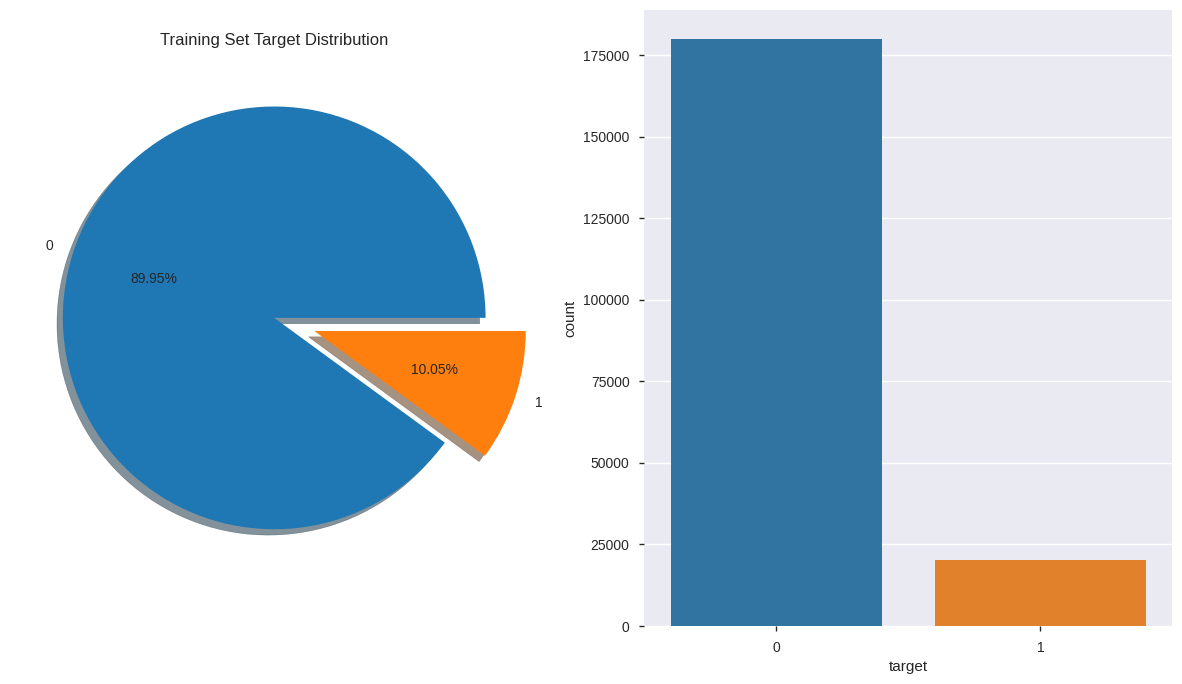

In [ ]:

f,ax=plt.subplots(1,2,figsize=(15,8))

train['target'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.2f%%',ax=ax[0],shadow=True)
ax[0].set_title('Training Set Target Distribution')
ax[0].set_ylabel('')
sns.countplot('target',data=train,ax=ax[1])
plt.show()
# The data is unbalanced with respect to target value

In [ ]:
# KDE(Kernal Density Estimate) plots of features with respect to target value 0 and 1 for all variables ie. var_0 to var_199

def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,5,figsize=(18,24))

    for feature in features:
        i += 1
        plt.subplot(10,5,i)
        sns.distplot(df1[feature], hist=False,label=label1,kde_kws = {'shade': True, 'linewidth': 2})
        sns.distplot(df2[feature], hist=False,label=label2,kde_kws = {'shade': True, 'linewidth': 2})
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=6, pad=-6)
        plt.tick_params(axis='y', labelsize=6)
    plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 59


<Figure size 800x550 with 0 Axes>

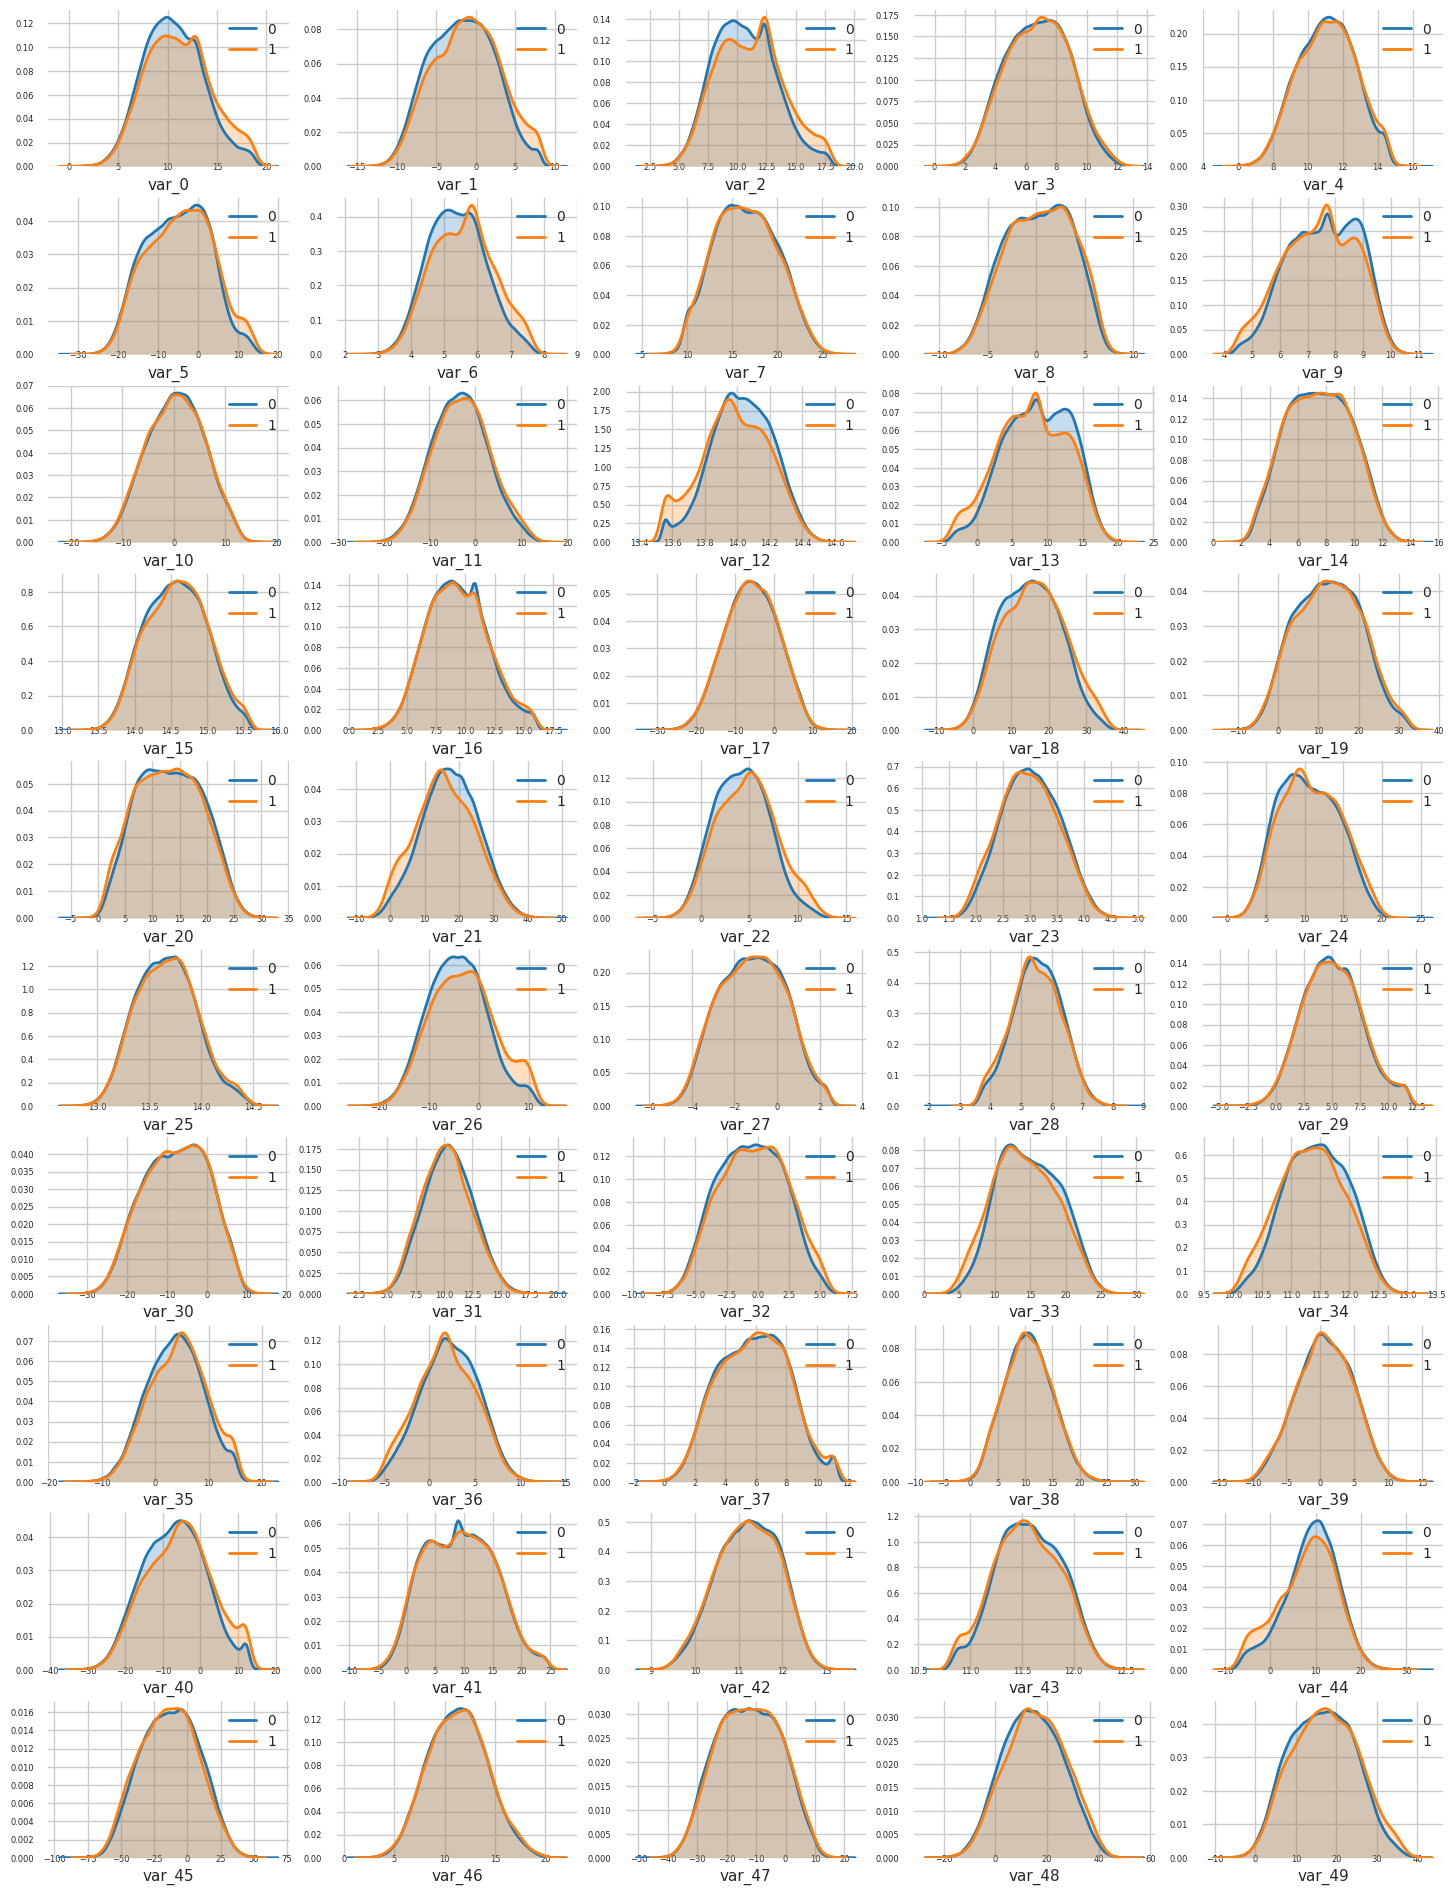

In [ ]:
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[2:52]
plot_feature_distribution(t0, t1, '0', '1', features)
#From var_0 to var_49


<Figure size 800x550 with 0 Axes>

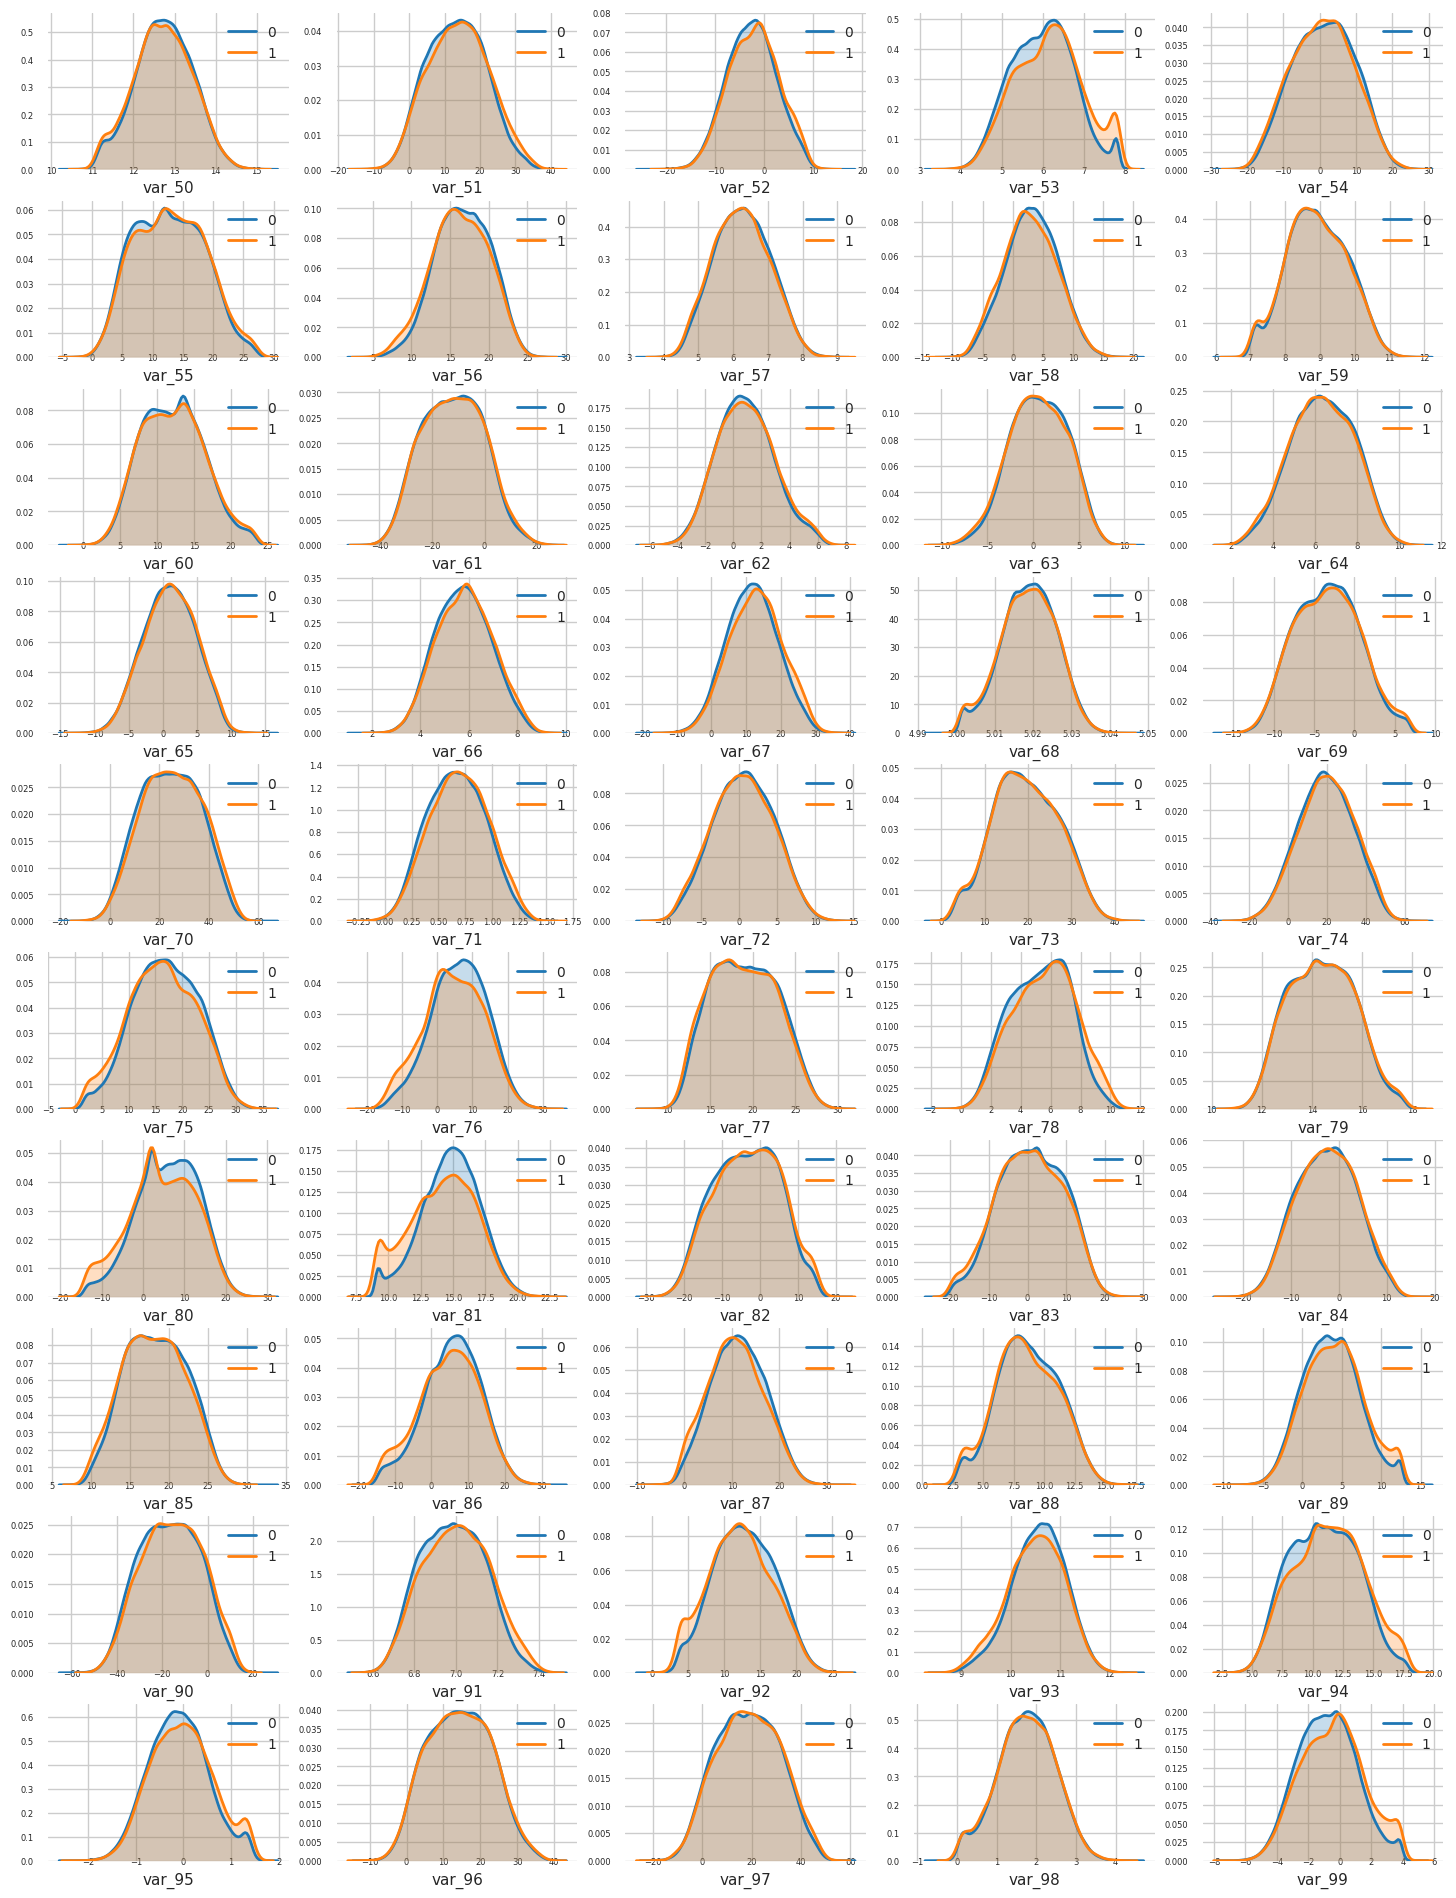

In [ ]:
features = train.columns.values[52:102]
plot_feature_distribution(t0, t1, '0', '1', features)
#From var_50 to var_99

<Figure size 800x550 with 0 Axes>

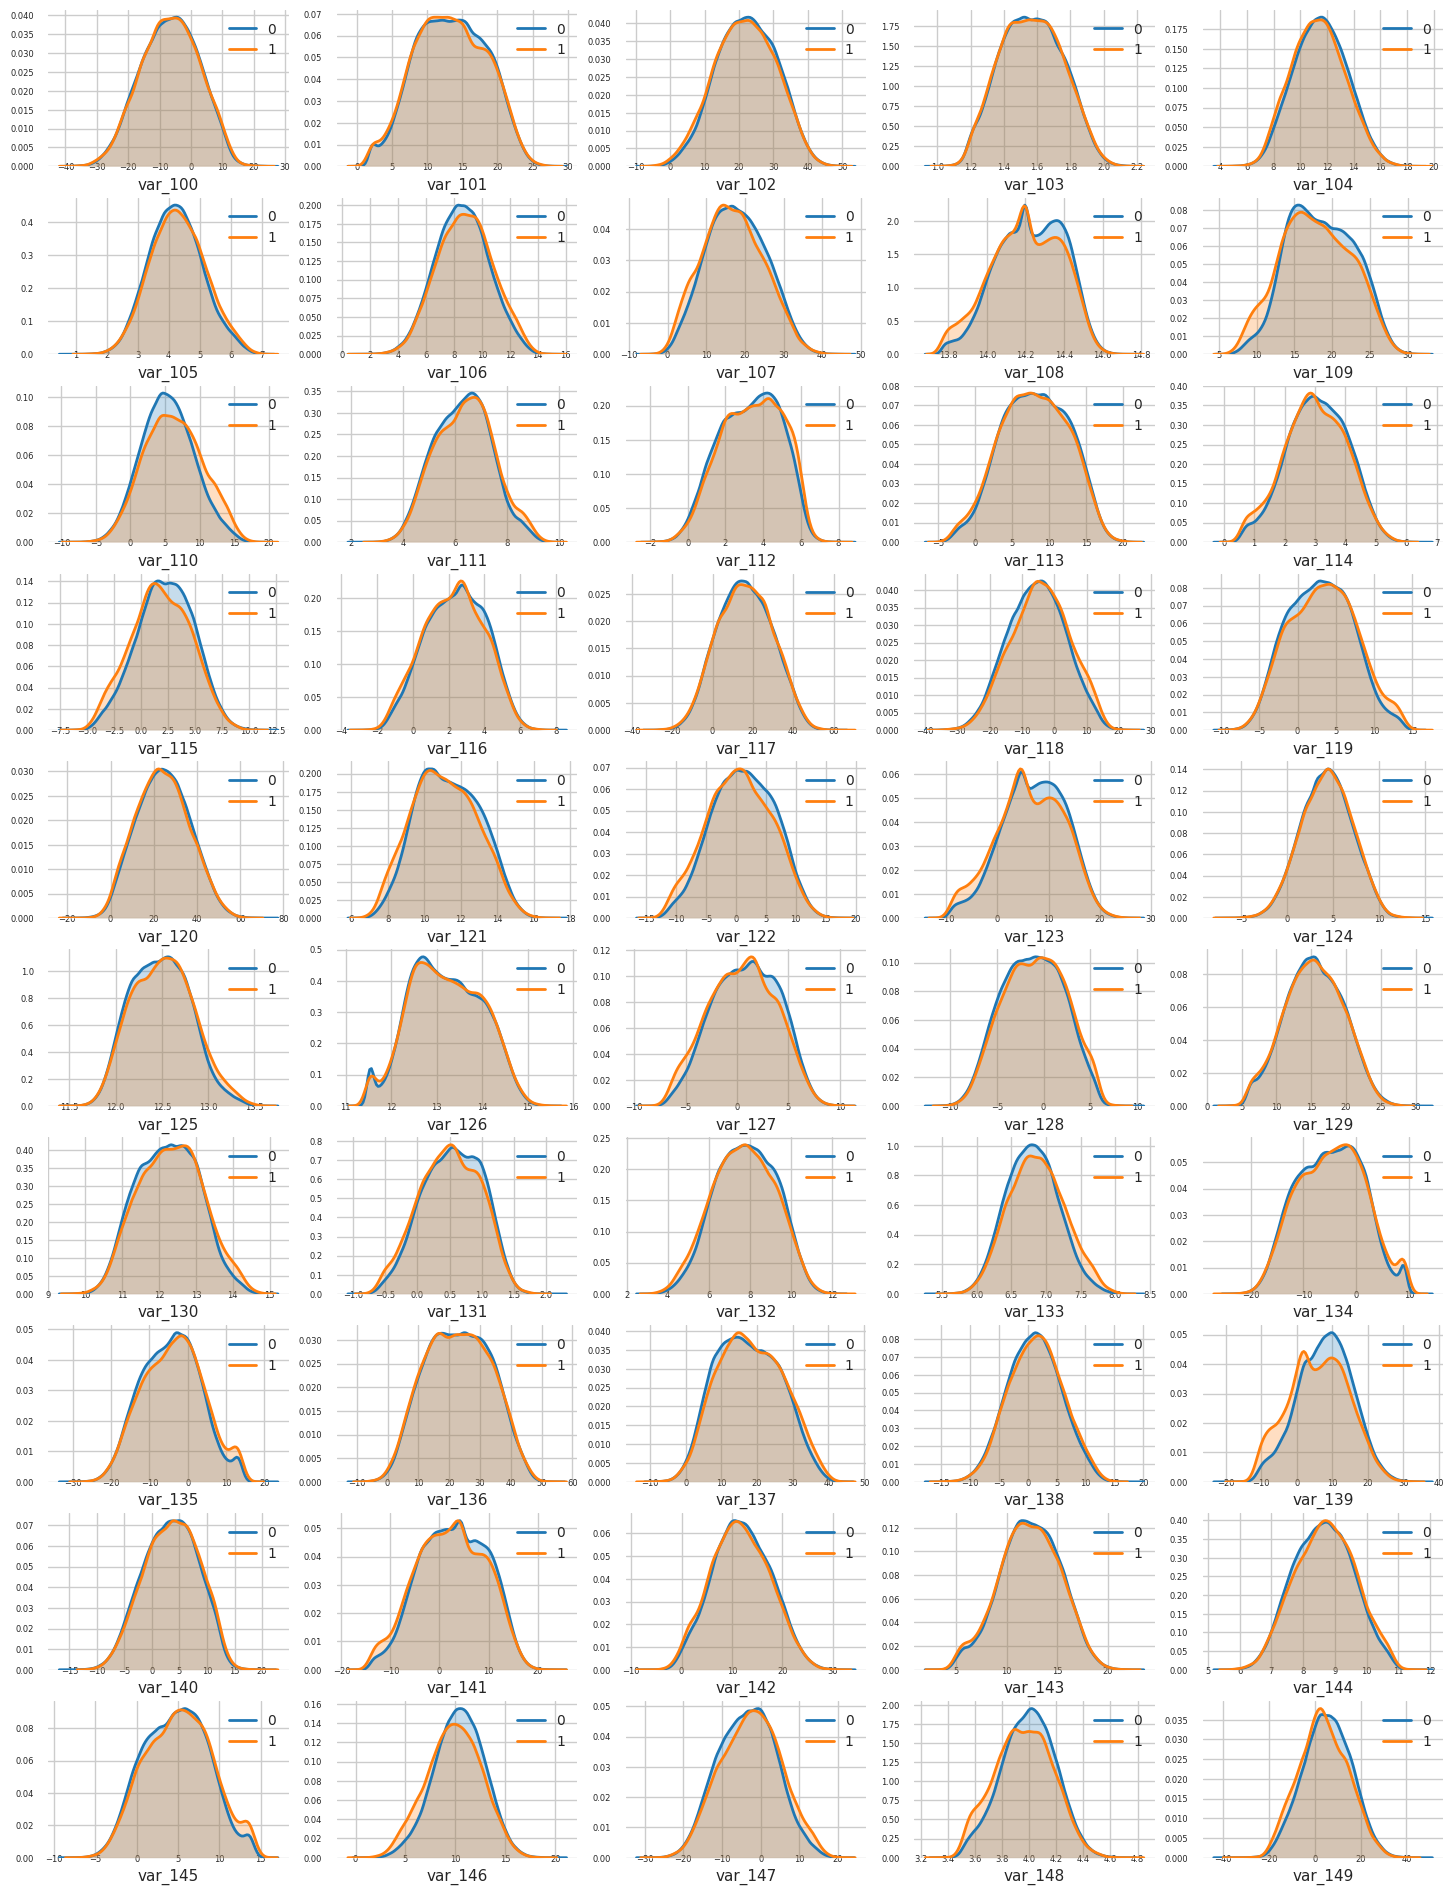

In [ ]:
features = train.columns.values[102:152]
plot_feature_distribution(t0, t1, '0', '1', features)
#From var_100 to var_149

<Figure size 800x550 with 0 Axes>

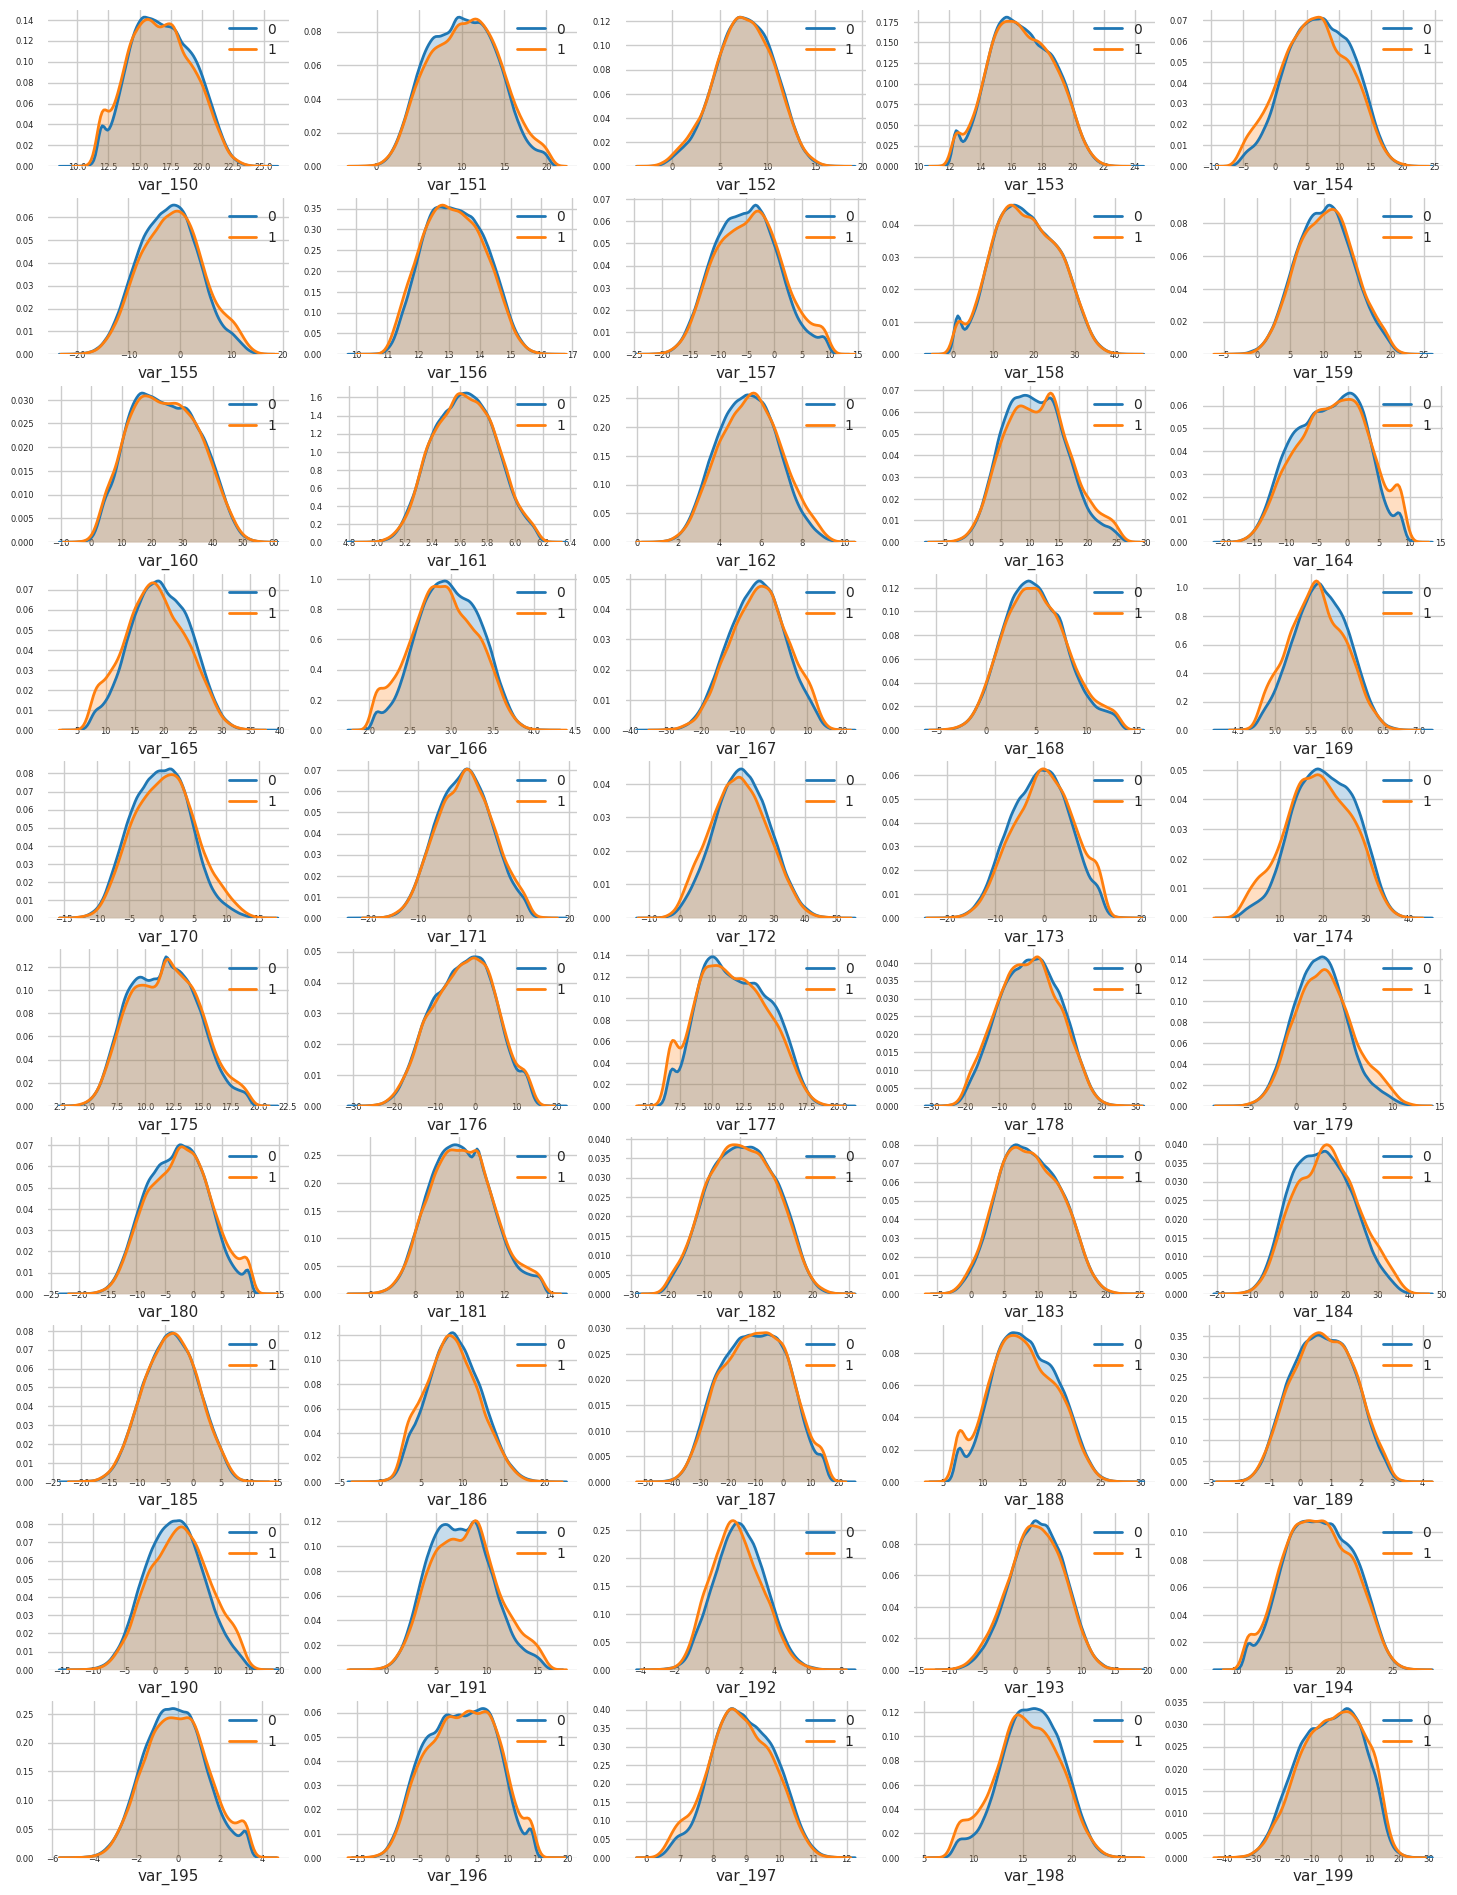

In [ ]:
features = train.columns.values[152:202]
plot_feature_distribution(t0, t1, '0', '1', features)
#From var_150 to var_199

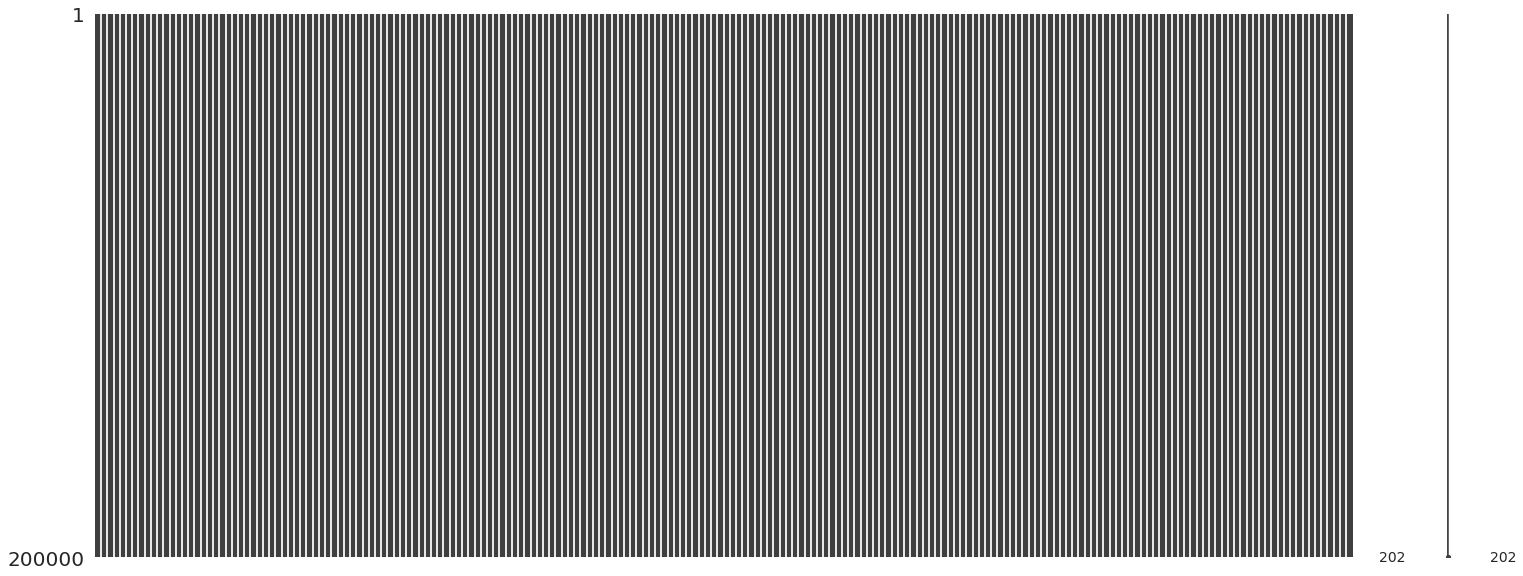

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(train)
#msno.bar(train)
#msno.heatmap(train)

In [ ]:
# Missing Value Analysis
obs = train.isnull().sum().sort_values(ascending = False)
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
pd.concat([obs, percent], axis = 1,keys= ['Number of Observations', 'Percent'])

# No missing values were found

Number of Observations  Percent
var_199                       0      0.0
var_61                        0      0.0
var_71                        0      0.0
var_70                        0      0.0
var_69                        0      0.0
...                         ...      ...
var_129                       0      0.0
var_128                       0      0.0
var_127                       0      0.0
var_126                       0      0.0
ID_code                       0      0.0

[202 rows x 2 columns]

In [ ]:
for col in train.columns[2:]:
    print("Number of unique values of {} : {}".format(col, train[col].nunique()))
    
#Most features have more than thousands of values for each variable except var_68 ie. (451)

Number of unique values of var_0 : 94672
Number of unique values of var_1 : 108932
Number of unique values of var_2 : 86555
Number of unique values of var_3 : 74597
Number of unique values of var_4 : 63515
Number of unique values of var_5 : 141029
Number of unique values of var_6 : 38599
Number of unique values of var_7 : 103063
Number of unique values of var_8 : 98617
Number of unique values of var_9 : 49417
Number of unique values of var_10 : 128764
Number of unique values of var_11 : 130193
Number of unique values of var_12 : 9561
Number of unique values of var_13 : 115181
Number of unique values of var_14 : 79122
Number of unique values of var_15 : 19810
Number of unique values of var_16 : 86918
Number of unique values of var_17 : 137823
Number of unique values of var_18 : 139515
Number of unique values of var_19 : 144180
Number of unique values of var_20 : 127764
Number of unique values of var_21 : 140062
Number of unique values of var_22 : 90660
Number of unique values of var_23 

In [ ]:
train['var_68'].value_counts()

5.0214    1084
5.0215    1081
5.0209    1080
5.0183    1077
5.0179    1071
          ... 
5.0407       1
5.0411       1
4.9938       1
4.9989       1
5.0431       1
Name: var_68, Length: 451, dtype: int64

In [ ]:
features = train.columns.values[2:202]
unique_max_train = []
for feature in features:
    values = train[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])

In [ ]:
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).
            sort_values(by = 'Max duplicates', ascending=False).head(15))

68       108      126  ...      166      133      43 
Feature         var_68  var_108  var_126  ...  var_166  var_133   var_43
Max duplicates    1084      313      305  ...       39       39       39
Value           5.0214  14.1999  11.5356  ...   2.7306   6.8632  11.4522

[3 rows x 15 columns]

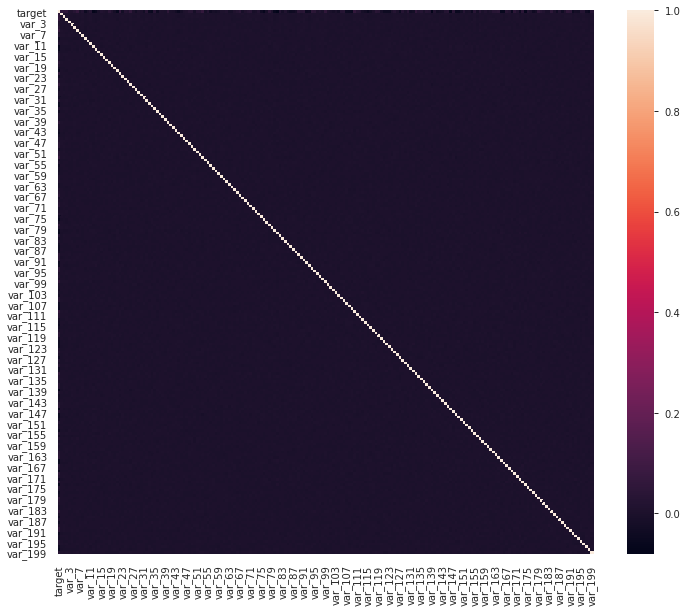

In [ ]:
train_corr = train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(train_corr)

In [ ]:
corr = train.corr()
abs(corr['target']).sort_values(ascending=False).head(30)

target     1.000000
var_81     0.080917
var_139    0.074080
var_12     0.069489
var_6      0.066731
var_110    0.064275
var_146    0.063644
var_53     0.063399
var_26     0.062422
var_76     0.061917
var_174    0.061669
var_22     0.060558
var_21     0.058483
var_99     0.058367
var_166    0.057773
var_80     0.057609
var_190    0.055973
var_2      0.055870
var_165    0.055734
var_13     0.055156
var_148    0.055011
var_133    0.054548
var_198    0.053000
var_34     0.052692
var_0      0.052390
var_1      0.050343
var_115    0.050174
var_179    0.050002
var_109    0.049926
var_40     0.049530
Name: target, dtype: float64

In [ ]:

def plot_feature_boxplot(df, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,5,figsize=(18,24))

    for feature in features:
        i += 1
        plt.subplot(10,5,i)
        sns.boxplot(df[feature]) 
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=6, pad=-6)
        plt.tick_params(axis='y', labelsize=6)
    plt.show()

<Figure size 432x288 with 0 Axes>

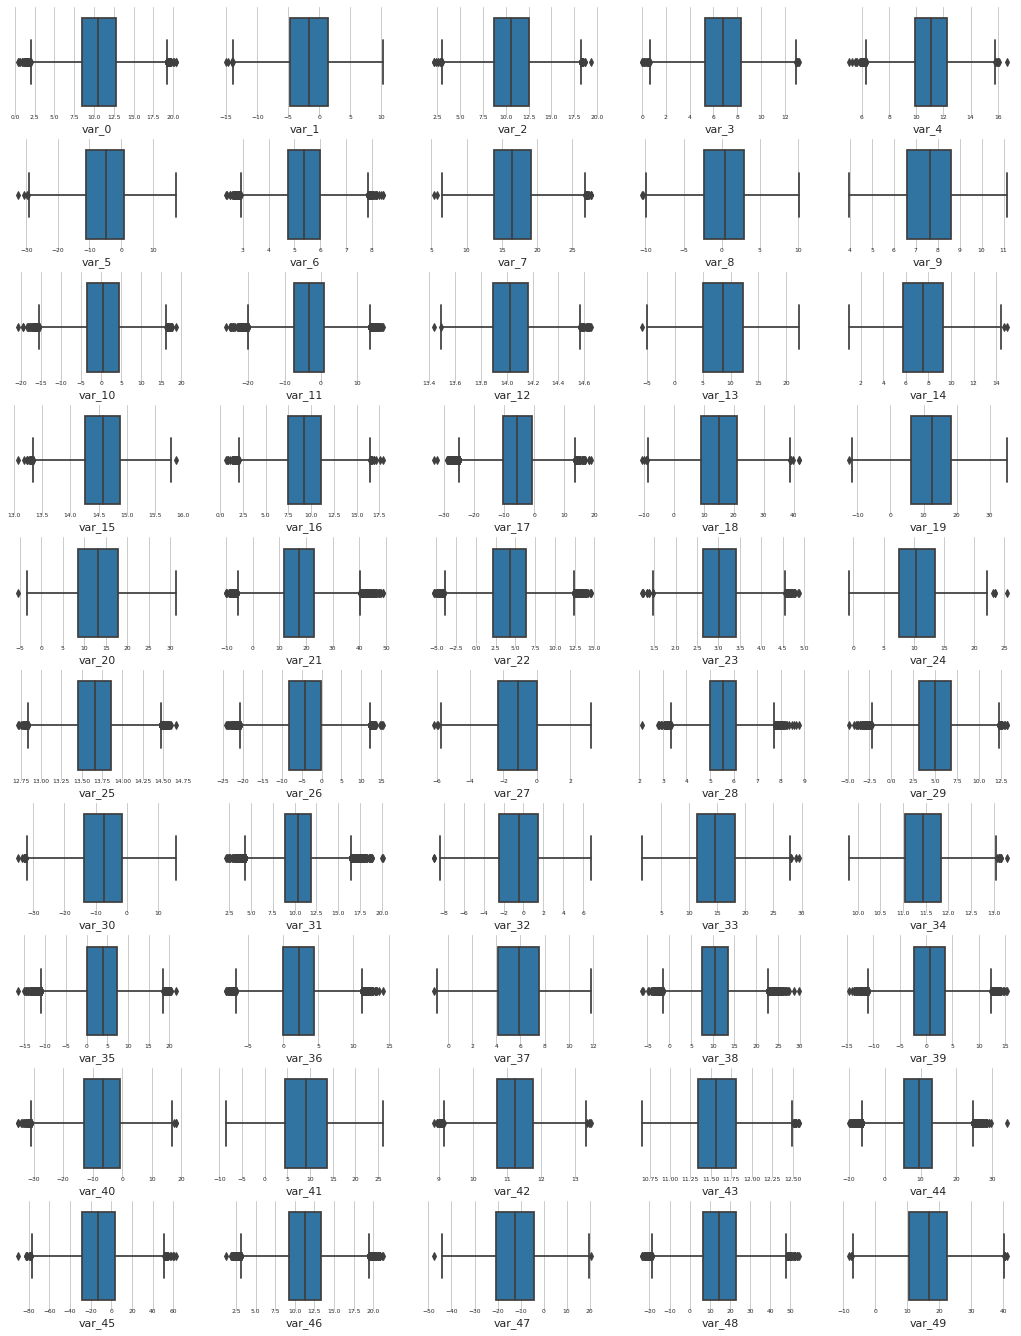

In [ ]:

features = train.columns.values[2:52]
plot_feature_boxplot(train, features)
#From var_0 to var_49

<Figure size 432x288 with 0 Axes>

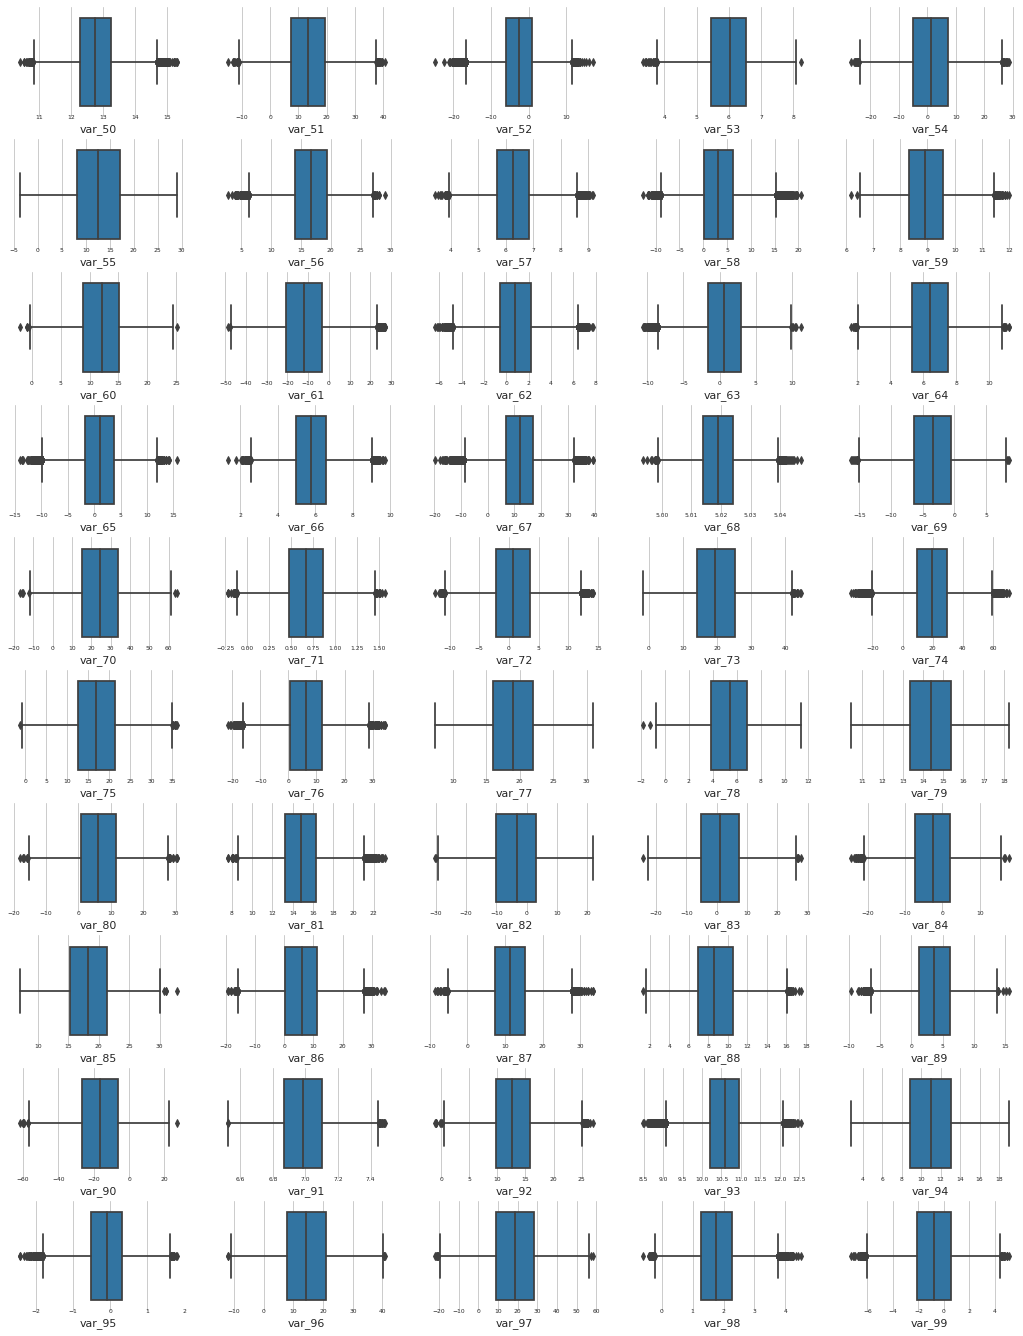

In [ ]:
features = train.columns.values[52:102]
plot_feature_boxplot(train, features)
#From var_50 to var_99

<Figure size 432x288 with 0 Axes>

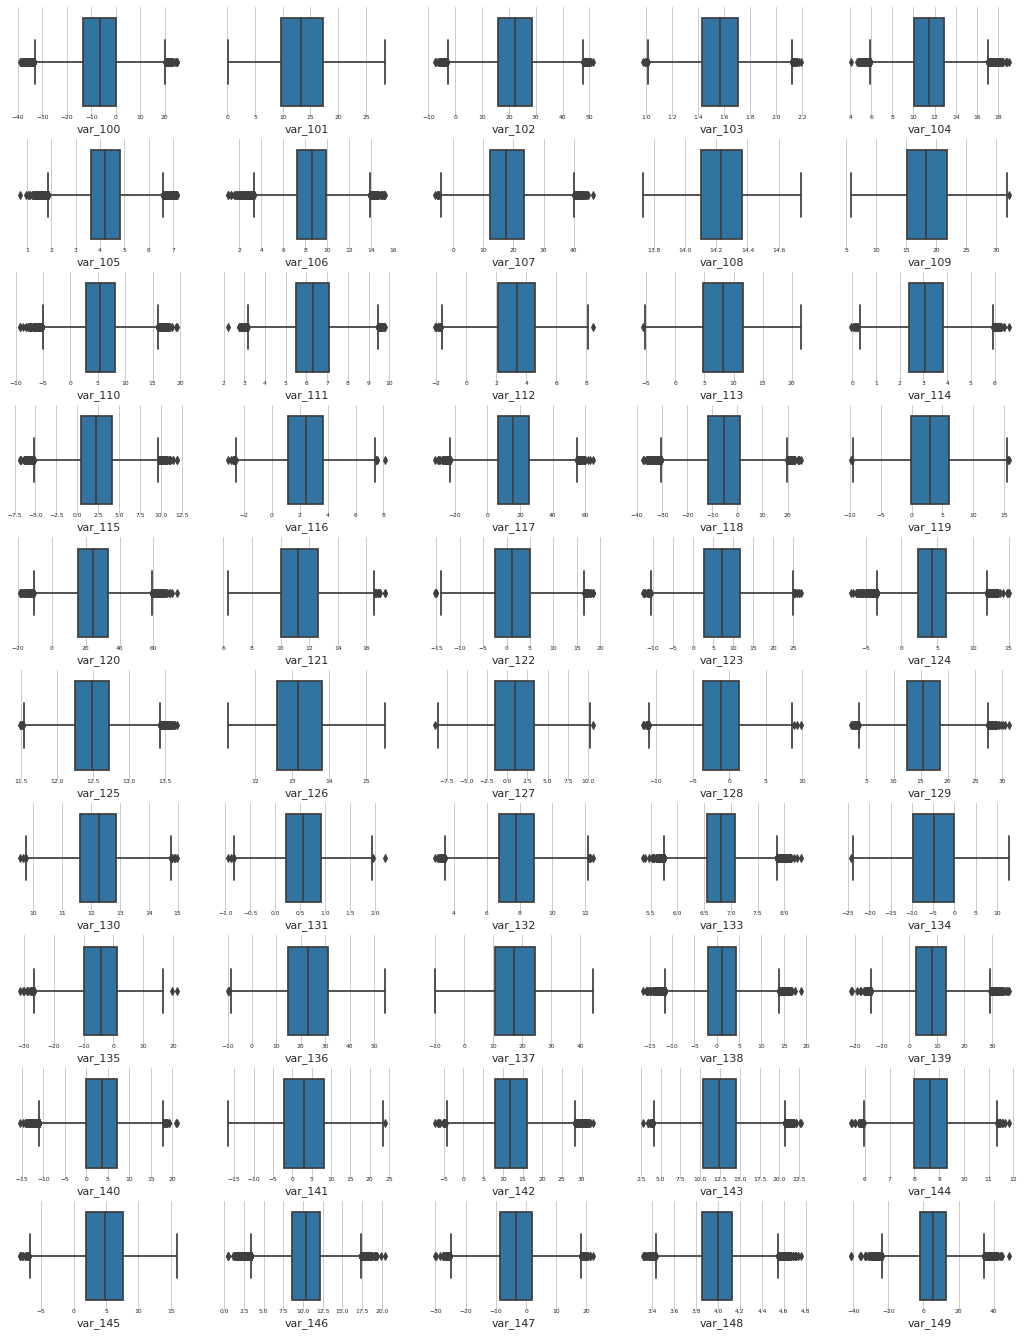

In [ ]:
features = train.columns.values[102:152]
plot_feature_boxplot(train, features)
#From var_100 to var_149

<Figure size 432x288 with 0 Axes>

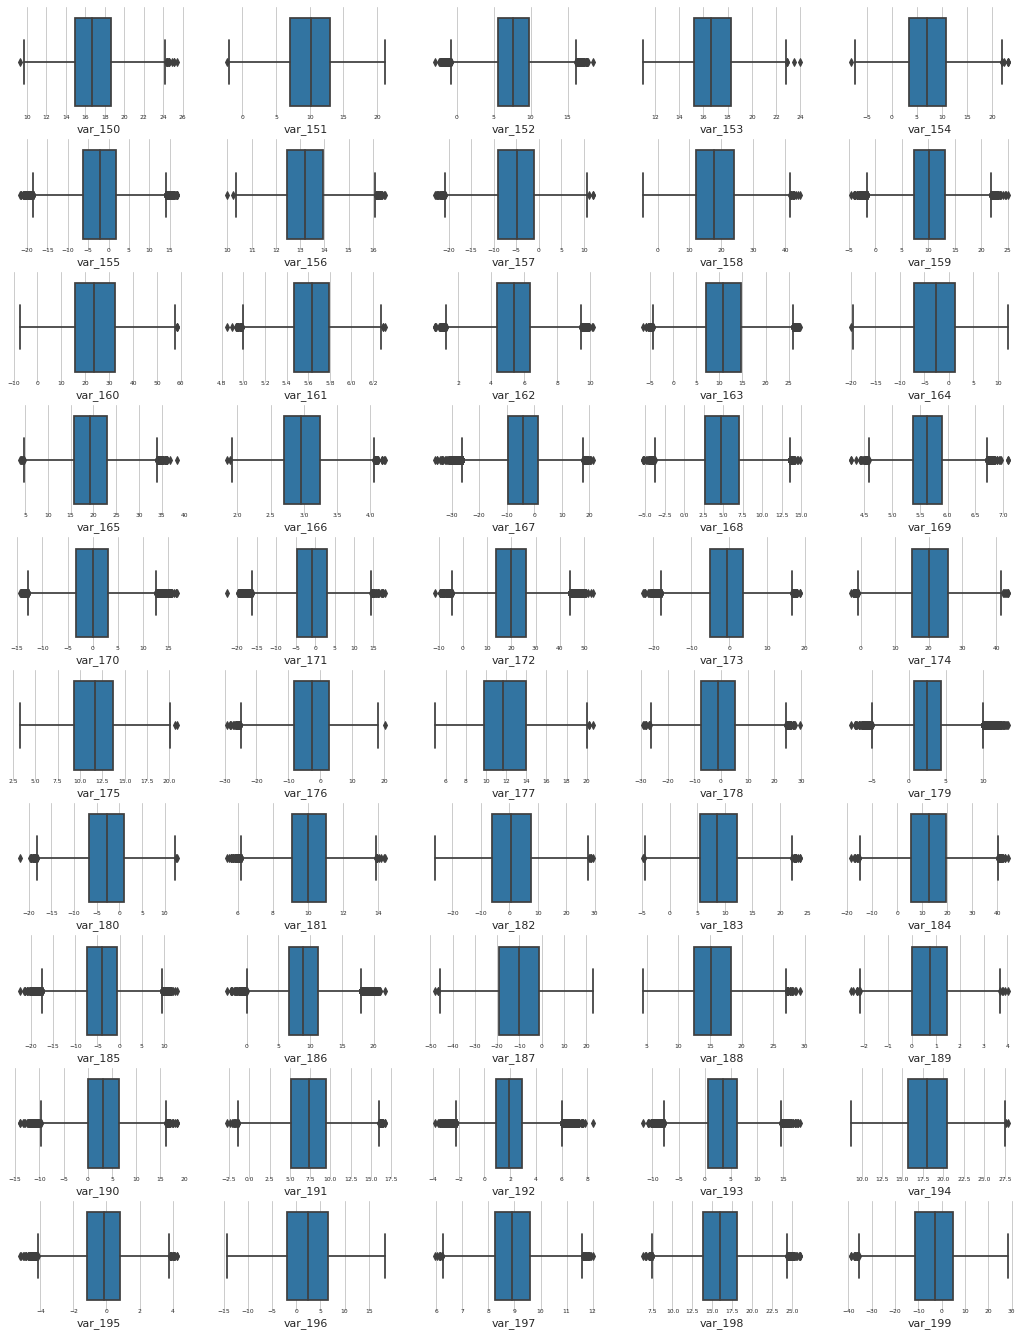

In [ ]:
features = train.columns.values[152:202]
plot_feature_boxplot(train, features)
#From var_150 to var_199

In [ ]:
# Detect outliers from IQR
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

target      0.000000
var_0       4.304350
var_1       6.098650
var_2       3.794225
var_3       3.070025
             ...    
var_195     2.000300
var_196     8.503650
var_197     1.340500
var_198     4.235025
var_199    16.045275
Length: 201, dtype: float64


In [ ]:
print("df.shape:",train.shape)
df_in = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out = train[((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
print("df_in.shape:",df_in.shape)
print("df_out.shape:",df_out.shape)

df.shape: (200000, 202)
df_in.shape: (157999, 202)
df_out.shape: (42001, 202)


In [ ]:
df_out['target'].value_counts()

0    21903
1    20098
Name: target, dtype: int64

In [ ]:
#df_out['target'].value_counts()
train['target'].value_counts()
# comparing the 'train' and 'df_out' dataset,
# we can say that all the data points with target equals to 1 are present as outliers

0    179902
1     20098
Name: target, dtype: int64

In [ ]:

from sklearn.preprocessing import StandardScaler

#scaling training data between -1 to +1
standardized_train = StandardScaler().fit_transform(train.set_index(['ID_code','target']))

In [ ]:
standardized_train

array([[-0.57710174, -1.27373702,  0.45170728, ..., -0.37396811,
        -1.02639785,  0.21413482],
       [ 0.26995857, -0.62213756,  1.19036045, ..., -0.12939961,
         0.82541712,  0.50568523],
       [-0.68111341, -0.2760664 ,  0.51698836, ..., -0.69514059,
        -0.38144932,  0.35668144],
       ...,
       [ 0.17870987, -0.84546901, -0.07667568, ..., -0.20904171,
        -0.67680579,  0.72102365],
       [-0.31746727, -1.72398014,  1.09630117, ...,  1.22180338,
        -0.11352617, -1.01298853],
       [ 0.06456676, -1.00810962,  0.53130173, ..., -0.78389704,
        -1.24290845,  0.33196403]])

In [ ]:

standardized_train = pd.DataFrame(standardized_train, columns=train.set_index(['ID_code','target']).columns)
standardized_train = train[['ID_code','target']].join(standardized_train)

standardized_train.head(10)

ID_code  target     var_0     var_1  ...   var_196   var_197   var_198   var_199
0  train_0       0 -0.577102 -1.273737  ...  1.022131 -0.373968 -1.026398  0.214135
1  train_1       0  0.269959 -0.622138  ...  1.067654 -0.129400  0.825417  0.505685
2  train_2       0 -0.681113 -0.276066  ... -1.617906 -0.695141 -0.381449  0.356681
3  train_3       0  0.125158 -0.129426  ... -0.959020  1.501744  0.697118 -0.543502
4  train_4       0 -0.277303  0.035610  ...  0.297627  0.645537  0.706318 -0.525375
5  train_5       0  0.261965 -0.170512  ... -1.086734  0.931880 -1.092623 -0.137351
6  train_6       0  0.371437  0.381335  ...  1.248005  0.223673 -1.655238  0.011193
7  train_7       0  0.946725 -1.570475  ...  0.350997  0.559385 -2.394045  0.652150
8  train_8       0  1.785233  1.004985  ... -0.619071 -0.771094  1.209151  0.782894
9  train_9       0  0.601599  0.889356  ...  2.168059 -1.079463  0.121816  1.684035

[10 rows x 202 columns]

In [ ]:

from sklearn.decomposition import PCA
k=80
pca = PCA(n_components=k, random_state=42, whiten=True)
pca.fit(standardized_train.set_index(['ID_code','target']))

PCA(copy=True, iterated_power='auto', n_components=80, random_state=42,
    svd_solver='auto', tol=0.0, whiten=True)

In [ ]:

sum(pca.explained_variance_ratio_)

0.4040625557015905

Text(0, 0.5, 'Proportion of variance explained by additional feature')

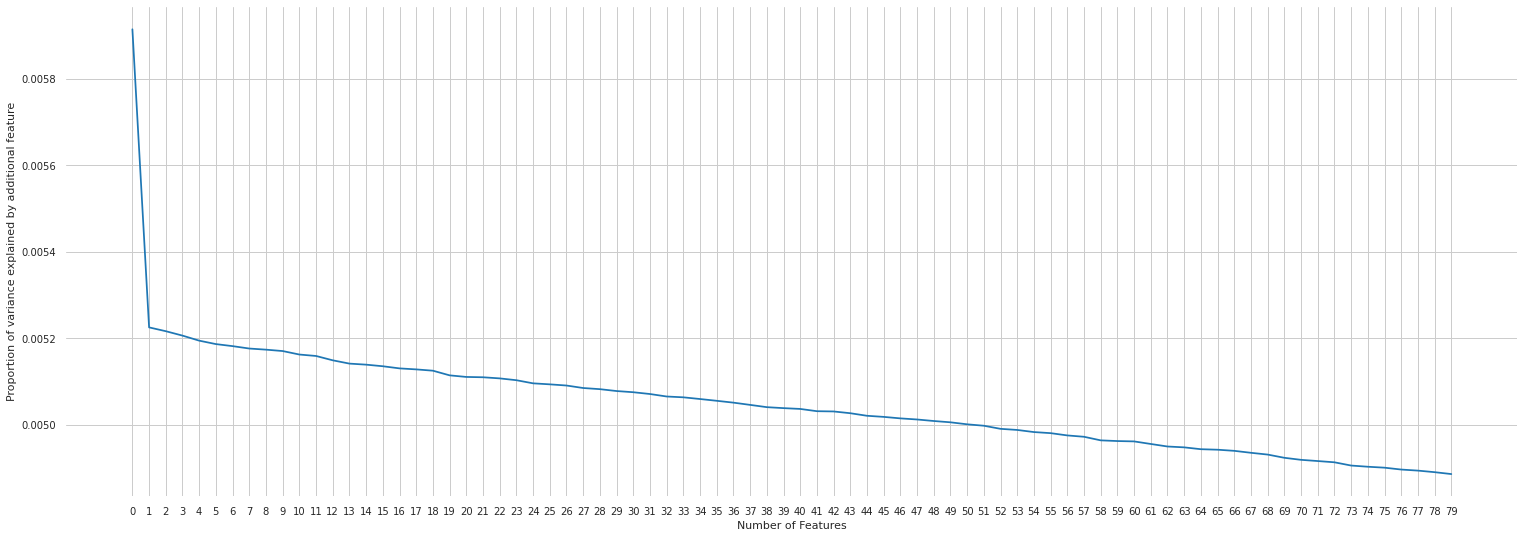

In [ ]:
plt.figure(figsize=(26,9))
plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(k))
plt.xlabel("Number of Features")
plt.ylabel("Proportion of variance explained by additional feature")

In [ ]:
sum(PCA(n_components=120, random_state=42, whiten=True).fit(standardized_train.set_index(['ID_code','target'])).\
explained_variance_ratio_)

0.6043175041677914

In [ ]:
sum(PCA(n_components=170, random_state=42, whiten=True).fit(standardized_train.set_index(['ID_code','target'])).\
explained_variance_ratio_)

0.857173786247749

In [ ]:
#Created new columns with the unique values count
for Oldvar in ['var_' + str(x) for x in range(200)]:
    train_count_values = train.groupby(Oldvar)[Oldvar].count()
    test_count_values = test.groupby(Oldvar)[Oldvar].count()
    train['new_' + Oldvar] = train_count_values.loc[train[Oldvar]].values
    test['new_' + Oldvar] = test_count_values.loc[test[Oldvar]].values

In [ ]:

train.head(3)

ID_code  target    var_0  ...  new_var_197  new_var_198  new_var_199
0  train_0       0   8.9255  ...           13            5            2
1  train_1       0  11.5006  ...           13            2            1
2  train_2       0   8.6093  ...            8            2            2

[3 rows x 402 columns]

In [ ]:
Target = train['target']

# Input dataset for Train and Test 
train_inp = train.drop(columns = ['target', 'ID_code'])
test_inp = test.drop(columns = ['ID_code'])

# List of feature names
features = list(train_inp.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_inp, Target, test_size= 0.3, random_state = 2019)

In [ ]:
# check the split of train and validation
print('Train:',X_train.shape)
print('Test:',X_test.shape)

Train: (140000, 400)
Test: (60000, 400)


In [ ]:
#Building Model for Logistic Regression

steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(class_weight='balanced'))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set
logreg_scaled = pipeline.fit(X_train,y_train)

y_pred = logreg_scaled.predict_proba(X_test)[:,1]

In [ ]:
## first make a model function for modeling with confusion matrix
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train)
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("the precision for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1]))
    fig= plt.figure(figsize=(10,7))
    print("TP",cnf_matrix[1,1]) # no of true transactions which are predicted as true 
    print("TN",cnf_matrix[0,0]) # no of false transaction which are predicted as false 
    print("FP",cnf_matrix[0,1]) # no of false transactions which are predicted as true
    print("FN",cnf_matrix[1,0]) # no of true transactions which are predicted as false 
    sns.heatmap(cnf_matrix,cmap="Blues",annot=True,fmt="d",linewidths=1,linecolor='black')
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))

the recall for this model is : 0.7710365349644569
the precision for this model is : 0.29435153045124646
TP 4664
TN 42770
FP 11181
FN 1385


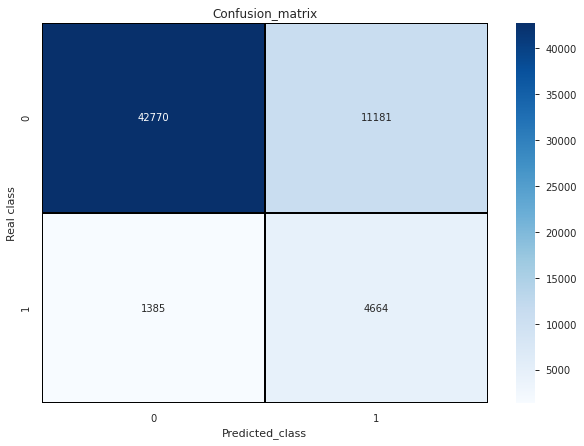


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     53951
           1       0.29      0.77      0.43      6049

    accuracy                           0.79     60000
   macro avg       0.63      0.78      0.65     60000
weighted avg       0.90      0.79      0.83     60000



In [ ]:
#Model Excecution for Logistic Regression
model(logreg_scaled,X_train, X_test, y_train, y_test)

In [ ]:
#ROC-AUC

def plot_roc_curve(fpr, tpr):  
    fig= plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('(ROC) Curve: ROC_AUC={0:0.5f}'.format(roc_auc_score(y_test, y_pred)))
    plt.title('Receiver Operating Characteristic (ROC) Curve: ROC_AUC={0:0.5f}'.format(roc_auc_score(y_test, y_pred)))
    plt.legend()
    plt.show()

In [ ]:
#PR-AUC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

def plot_precision_recall(y_test, y_pred): 
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate precision-recall AUC
    AUC = auc(recall, precision)
    print('Precision-Recall curve: PR_AUC={0:0.3f}'.format(auc(recall, precision)))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(' Precision-Recall curve: PR_AUC={0:0.3f}'.format( auc(recall, precision)))
# plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
# show the plot
    plt.show()

Precision-Recall curve: PR_AUC=0.516


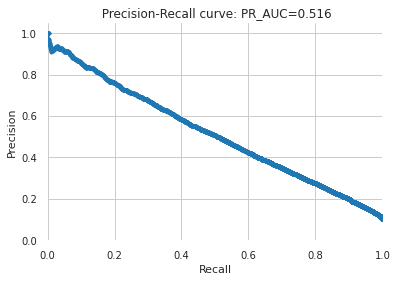

In [ ]:
# PR-AUC for Logistic Regression
plot_precision_recall(y_test, y_pred)

(ROC) Curve: ROC_AUC=0.86277


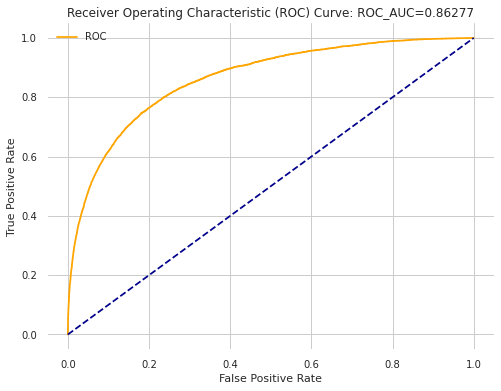

In [ ]:

# ROC-AUC for Logistic Regression
y_pred = logreg_scaled.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
plot_roc_curve(fpr, tpr)

In [ ]:
#Summary for Logistic Regression

#PR score of 0.516, and ROC_AUC score of 0.86227

In [ ]:
#decision trees


#Building Model--DT
tree_clf = DecisionTreeClassifier(class_weight='balanced', random_state = 2019, 
                                  max_features = 0.7, min_samples_leaf = 80)

the recall for this model is : 0.5617457430980327
the precision for this model is : 0.15279464004676468
TP 3398
TN 35110
FP 18841
FN 2651


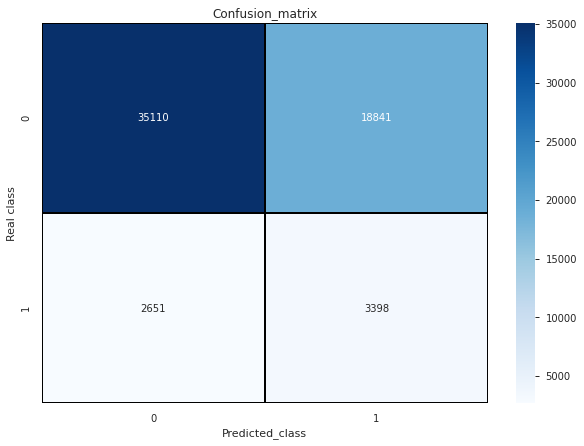


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.65      0.77     53951
           1       0.15      0.56      0.24      6049

    accuracy                           0.64     60000
   macro avg       0.54      0.61      0.50     60000
weighted avg       0.85      0.64      0.71     60000



In [ ]:
model(tree_clf,X_train, X_test, y_train, y_test)

(ROC) Curve: ROC_AUC=0.64563


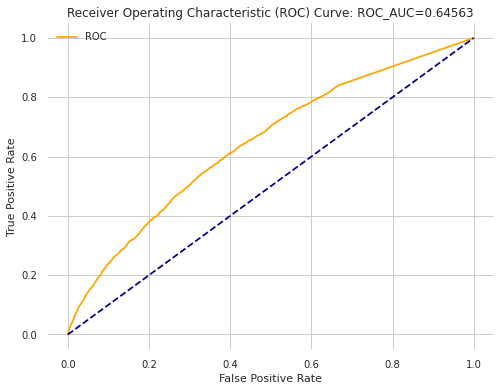

In [ ]:
#ROC-AUC for DT

y_pred = tree_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

Precision-Recall curve: PR_AUC=0.179


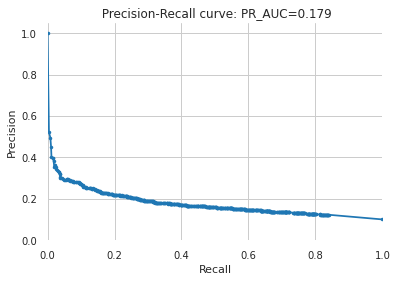

In [ ]:

# PR-AUC for DT

plot_precision_recall(y_test, y_pred)

In [ ]:
# Extract feature importances--DT

feature_importance_values = tree_clf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False).head(n=10)

feature  importance
81    var_81    0.060000
139  var_139    0.046336
12    var_12    0.038998
146  var_146    0.026827
26    var_26    0.026695
53    var_53    0.024909
110  var_110    0.024318
166  var_166    0.020299
174  var_174    0.018643
109  var_109    0.017605

In [ ]:
# SUmmary for DT Model
#PR score of 0.179, and ROC_AUC score of 0.64563

In [ ]:
#RandomForest

# Create random Forest Object using the mentioned parameters
random_forest = RandomForestClassifier(n_estimators=50, random_state=2019, verbose=1,
                                      class_weight='balanced', max_features = 0.5, 
                                       min_samples_leaf = 50)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 21.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


the recall for this model is : 0.35328153413787405
the precision for this model is : 0.3470282559272491
TP 2137
TN 49930
FP 4021
FN 3912


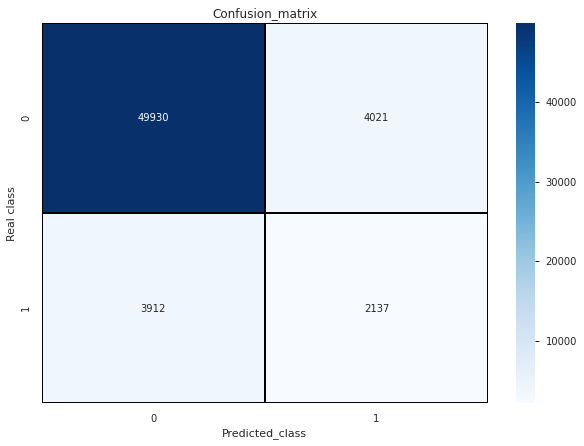


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     53951
           1       0.35      0.35      0.35      6049

    accuracy                           0.87     60000
   macro avg       0.64      0.64      0.64     60000
weighted avg       0.87      0.87      0.87     60000



In [ ]:
model(random_forest,X_train, X_test, y_train, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


(ROC) Curve: ROC_AUC=0.78519


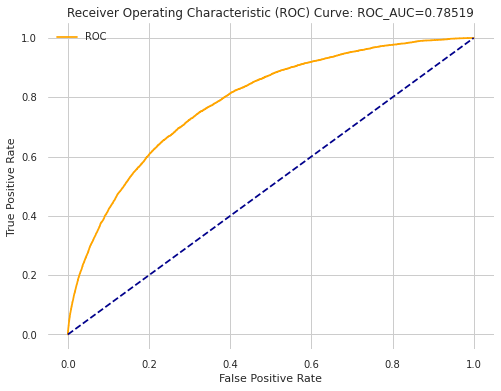

In [ ]:
#ROC-AUC for Random Forest

y_pred = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

Precision-Recall curve: PR_AUC=0.318


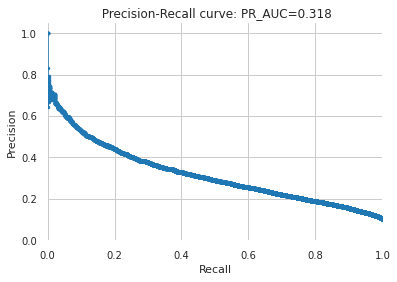

In [ ]:
# PR-AUC for Random Forest
plot_precision_recall(y_test, y_pred)

In [ ]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False).head(n=10)

feature  importance
81    var_81    0.049295
139  var_139    0.039197
12    var_12    0.029136
26    var_26    0.022760
53    var_53    0.022218
110  var_110    0.021640
146  var_146    0.020735
6      var_6    0.017243
174  var_174    0.016083
109  var_109    0.013867

In [ ]:
#Summary for Random Forest  
#PR score of 0.318, and ROC_AUC score of 0.78519

In [ ]:
#Building Model Naive Bayes

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

the recall for this model is : 0.3570838155066953
the precision for this model is : 0.5045550105115627
TP 2160
TN 51830
FP 2121
FN 3889


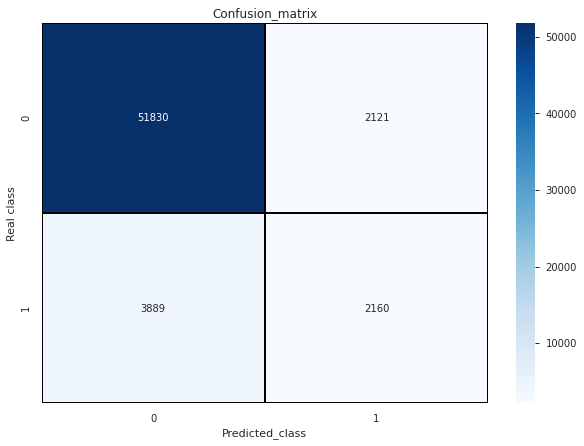


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     53951
           1       0.50      0.36      0.42      6049

    accuracy                           0.90     60000
   macro avg       0.72      0.66      0.68     60000
weighted avg       0.89      0.90      0.89     60000



In [ ]:
#Executing Naive Bayes Model
model(gnb,X_train, X_test, y_train, y_test)

[0.01093168 0.35148674 0.60950485 ... 0.03858558 0.10712409 0.00319846]
(ROC) Curve: ROC_AUC=0.86000


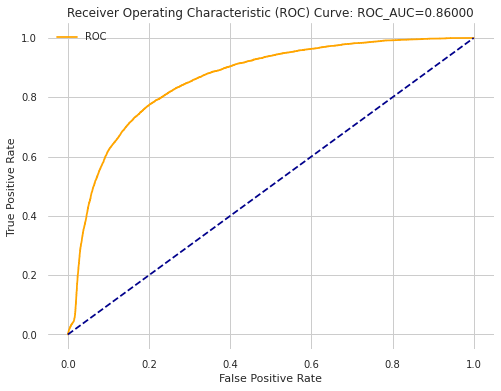

In [ ]:
#ROC-AUC for Naive Bayes

y_pred = gnb.predict_proba(X_test)[:,1]
print(y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

Precision-Recall curve: PR_AUC=0.380


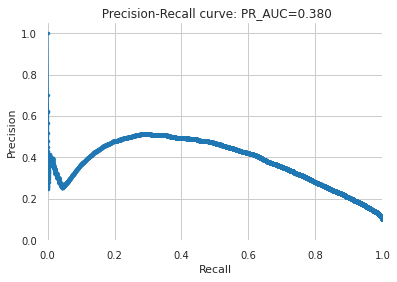

In [ ]:
# PR-AUC for DT

plot_precision_recall(y_test, y_pred)

In [ ]:
#Summary for Naive Bayes  
#PR score of 0.318, and ROC_AUC score of 0.6588

the recall for this model is : 0.3570838155066953
the precision for this model is : 0.5045550105115627
TP 2160
TN 51830
FP 2121
FN 3889


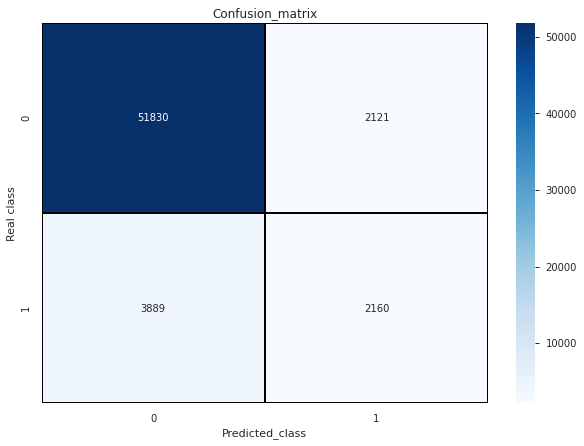


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     53951
           1       0.50      0.36      0.42      6049

    accuracy                           0.90     60000
   macro avg       0.72      0.66      0.68     60000
weighted avg       0.89      0.90      0.89     60000



In [ ]:
#Final Model Selection
#From the above all stats Nave Bayes has highest PR-AUC score ie. 0.380
#Hence we are training our model with Nave Bayes and Predicting test dataset using this model.

#Model Excecution for Nave Bayes
gnb = GaussianNB()
model(gnb,X_train, X_test, y_train, y_test)

In [ ]:
#predicting test.csv dataset

test_inp = test.drop(columns = ['ID_code'])
predictions = gnb.predict(test_inp)
pred_df = pd.DataFrame(predictions, columns=(['target']))
f_test = test[['ID_code']].join(pred_df)
final_test=f_test.join(test_inp)
print(final_test['target'].value_counts())


final_test.head(15)

0    196901
1      3099
Name: target, dtype: int64


ID_code  target    var_0  ...  new_var_197  new_var_198  new_var_199
0    test_0       0  11.0656  ...            5            5            4
1    test_1       0   8.5304  ...            9            3            7
2    test_2       0   5.4827  ...            5            6            2
3    test_3       1   8.5374  ...            1            6            3
4    test_4       0  11.7058  ...            6            5            5
5    test_5       0   5.9862  ...            9            9            5
6    test_6       0   8.4624  ...           13            4            4
7    test_7       0  17.3035  ...            5            1            4
8    test_8       0   6.9856  ...           17            3            5
9    test_9       0  10.3811  ...           13           12            5
10  test_10       0   8.3431  ...            6            3            2
11  test_11       0  10.6137  ...            7            5            3
12  test_12       0  12.7465  ...            9            5            2
13  test_13       0  11.7836  ...           11            7            2
14  test_14       0   7.0360  ...            6            7            3

[15 rows x 402 columns]

In [ ]:
# uncomment below code to save file if using google Colab
# writing predicted values to predicted_file.csv 


#from google.colab import files
#final_test.to_csv('predicted_file.csv') 
#files.download('predicted_file.csv')

final_test.to_csv('predicted_file.csv')